# Исследование объявлений о продаже квартир

# Описание проекта

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Для этого провести  исследовательский анализ данных и установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

# Описание данных

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

# Ход выполнения проекта

**Шаг 1. Загрузить файл с данными и изучить общую информацию**

- Загрузим данные из csv-файла в датафрейм c помощью библиотеки pandas
- Изучим общую информацию о полученном датафрейме

**Шаг 2. Предобработка данных**

- Переименуем столбцы
- Проверим наличие явных дубликатов
- Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты
- Найдем и изучим пропущенные значения в столбцах
- Рассмотрим типы данных в каждом столбце

**Шаг 3. Добавить в таблицу новые столбцы со следующими параметрами:**
- цена одного квадратного метра;
- день недели публикации объявления;
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры;
- расстояние до центра города в километрах

**Шаг 4. Проведем исследовательский анализ данных:**
- Изучим параметры объектов и построим отдельные гистограммы для каждого из этих параметров:
    - цена объекта;
    - общая площадь;
    - жилая площадь;
    - площадь кухни;
    - количество комнат;
    - высота потолков;
    - тип этажа квартиры («первый», «последний», «другой»);
    - общее количество этажей в доме;
    - расстояние до центра города в метрах;
    - расстояние до ближайшего парка
- Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
- Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта
- Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
- Вычислим среднюю стоимость квартир в Санкт-Петербурге на разном удалении от центра

**Шаг 5. Общий вывод**

### Загрузка файла и изучение общей информацию

In [1]:
# импортируем необходимые библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import datetime as dt

In [2]:
# загрузим данные
data = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')

In [3]:
# изучим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# выведем первые 5 строчек датафрейма
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
# выведем последние 5 строчек датафрейма
data.tail(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В результате вывода общей информации о датафрейме видим 22 столбца, 23699 строк в некоторых из которых достаточно много пропусков, природу которых нужно тщательнее узнать, проанализировать и заполнить, либо удалить в случае необходимости. Столбец `first_day_exposition` приведем к типу данных datetime, а столбец `is_apartment` к булеву массиву согласно документации. Помимо этого некоторые столбцы написаны в змеином регистре, переименуем их для удобства.

### Предобработка данных

Пройдемся по датафрейму. Обратим внимания на названия столбцов, значения, пропуски и приведём данные в порядок.

#### Переимененование столбцов

In [6]:
# переименуем столбцы
data = data.rename(columns = {'rooms':'rooms_number',
                              'cityCenters_nearest':'city_centers_nearest',
                              'parks_around3000':'parks_around_3000',
                             'ponds_around3000':'ponds_around_3000'}
                  )
# проверим изменения названия столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms_number', 'ceiling_height', 'floors_total', 'living_area',
       'floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area',
       'balcony', 'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Обработка дубликатов

- Явные дубликаты

In [7]:
# узнаем количество явных дубликатов
data.duplicated().sum()

0

Явных дубликатов не выявлено.

- Неявные дубликаты

In [8]:
# обработаем данные в столбце
# названия населенным пунктов с буквой ё в названии заменим на е и приведем к общему формату для удаления дубликатов
# заменим также неявные дубликаты
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace('поселок Рябово', 'поселок городского типа Рябово', regex=True)
    .replace('поселок Саперное', 'поселок Саперный',regex=True )
) 

# список населенных пунктов
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Свирьстрой',
       'городской поселок Советский', 'городской поселок Фед

Неявные дубликаты обработаны.

#### Обработка пропусков

- Пропущенные значения в столбце наличия балкона, скорее всего, означают, что балкона нет. Заменим пропуски на значение 0.

In [9]:
# заменим пропущенные значения в столбце balcony 
data['balcony'] = data['balcony'].fillna('0')

In [10]:
# проверим что все пропуски заполнены
data['balcony'].isna().sum()

0

Пропусков нет.

- Аналогично значениям в столбце балконов заменим пропуски для столбцов наличия парков и прудов в пределах 3000 метров.

In [11]:
# заменим пропущенные значения в столбцах ponds_around_3000 и parks_around_3000
data['ponds_around_3000'] = data['ponds_around_3000'].fillna('0')
data['parks_around_3000'] = data['parks_around_3000'].fillna('0')

In [12]:
# проверим что все пропуски заполнены
display(data['ponds_around_3000'].isna().sum())
data['parks_around_3000'].isna().sum()

0

0

Пропусков нет.

- Посмотрим столбец с названиями населенных пунктов `locality_name`.

In [13]:
# найдем сумму пропущенных значений
data['locality_name'].isna().sum()

49

In [14]:
# наёдем процент пропущенных значений
percentage = (data['locality_name'].isna().sum())/(data['locality_name'].count())
display(f'Процент пропущенных значений:{percentage:.2%}')

'Процент пропущенных значений:0.21%'

Так как достоверно определить район расположения квартиры не представляется возможным и процент пропусков составляет всего 0.21%, удалим значения с пропусками в `locality_name`.


In [15]:
# удалим строки с пропущенными значениями
data.dropna(subset =['locality_name'], inplace = True)

# обновим индексы
data.reset_index(drop = True)

# выведем 10 рандомных значений таблицы
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms_number,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2554,13,4300000.0,46.00,2018-02-07T00:00:00,2,2.50,5.0,30.00,2,NaN,...,6.40,1.0,Санкт-Петербург,27216.0,8195.0,0.0,NaN,0.0,NaN,88.0
13138,7,5535000.0,72.40,2018-03-26T00:00:00,3,2.75,20.0,40.70,15,NaN,...,10.40,1.0,Кудрово,NaN,NaN,0,NaN,0,NaN,191.0
8244,15,6500000.0,67.00,2017-11-29T00:00:00,2,2.51,12.0,NaN,8,NaN,...,NaN,0,Санкт-Петербург,13298.0,15890.0,0.0,NaN,0.0,NaN,8.0
1236,13,6500000.0,71.80,2016-03-29T00:00:00,4,2.50,9.0,47.90,2,False,...,6.20,1.0,Санкт-Петербург,52072.0,17061.0,1.0,1133.0,3.0,239.0,325.0
16244,20,4200000.0,45.00,2019-04-21T00:00:00,2,2.55,5.0,30.30,5,NaN,...,7.00,1.0,Санкт-Петербург,15191.0,13732.0,0.0,NaN,0.0,NaN,6.0
5888,13,3300000.0,35.00,2016-11-23T00:00:00,1,2.70,24.0,18.00,17,False,...,8.00,2.0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,590.0
22721,4,2300000.0,40.70,2017-12-08T00:00:00,1,2.75,5.0,17.50,3,NaN,...,10.60,1.0,Никольское,NaN,NaN,0,NaN,0,NaN,77.0
15977,5,6100000.0,54.30,2017-08-25T00:00:00,2,2.55,17.0,29.00,11,NaN,...,8.50,2.0,Санкт-Петербург,29871.0,10735.0,1.0,361.0,0.0,NaN,245.0
21028,3,6088000.0,83.37,2018-07-16T00:00:00,3,2.70,7.0,51.78,1,NaN,...,11.11,4.0,городской поселок Янино-1,NaN,NaN,0,NaN,0,NaN,65.0
8438,13,4700000.0,74.00,2019-04-12T00:00:00,4,2.50,5.0,53.00,4,NaN,...,9.00,2.0,Выборг,NaN,NaN,0,NaN,0,NaN,NaN


- Столбец `is_apartment`

Изменим тип данных в столбце is_apartment, так как согласно документации указано, он является булевым массивом.

In [16]:
# изменим тип данных
data['is_apartment'] = data['is_apartment'].astype('bool')

In [17]:
# проверим наличие пропусков
data['is_apartment'].isna().sum()

0

Пропусков нет.

- Столбец, отражающий количество комнат - `rooms_number`

Есть значения, в которых количество комнат равно 0. \
Такого быть не может. Скорее всего строки со значением 0 - это квартира-студия, если это так, изменим значения с 0 на 1.


In [18]:
# количество 0 комнат
data[data['rooms_number'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms_number,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,True,...,NaN,2.0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,True,...,NaN,0.0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,True,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,True,...,NaN,1.0,поселок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,True,...,NaN,0,поселок Шушары,NaN,NaN,0,NaN,0,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,True,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,NaN,24.0,18.00,4,True,...,NaN,2.0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,True,...,NaN,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,NaN,9.0,18.00,8,True,...,NaN,2.0,Никольское,NaN,NaN,0,NaN,0,NaN,82.0


In [19]:
# количество студий
data[data['studio'] == True]

,total_images,last_price,total_area,first_day_exposition,rooms_number,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,True,...,NaN,2.0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,181.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,True,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,True,...,NaN,0,поселок Шушары,NaN,NaN,0,NaN,0,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,True,...,NaN,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,True,...,NaN,0.0,поселок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17T00:00:00,0,NaN,25.0,18.20,5,True,...,NaN,0,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.00,10,True,...,NaN,0,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,True,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,True,...,NaN,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


In [20]:
# проверим квартиры, где количество комнат 0 и указано что это не студия
data[(data['rooms_number'] == 0) & (data['studio'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms_number,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.0,1,True,...,NaN,0.0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.3,19,True,...,NaN,1.0,поселок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,NaN,18.0,NaN,8,True,...,NaN,1.0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,45.0
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5.0,15.0,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,0,NaN,0,NaN,7.0
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,NaN,27.0,18.0,7,True,...,NaN,2.0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,483.0
1574,0,2200000.0,22.00,2017-11-03T00:00:00,0,NaN,18.0,15.0,16,True,...,NaN,1.0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,81.0
1625,7,1980000.0,23.98,2018-02-01T00:00:00,0,NaN,4.0,10.5,3,True,...,NaN,1.0,поселок станции Корнево,NaN,NaN,0,NaN,0,NaN,120.0
2532,5,3500000.0,27.10,2018-02-01T00:00:00,0,NaN,18.0,18.7,9,True,...,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
3019,18,2100000.0,24.00,2017-11-10T00:00:00,0,NaN,10.0,18.0,6,True,...,NaN,2.0,Сертолово,NaN,NaN,0,NaN,0,NaN,5.0
4115,7,2600000.0,24.00,2018-02-01T00:00:00,0,NaN,25.0,18.0,4,True,...,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0


Для большинства квартир подтвердилось утверждение, что 0 является студий по булевому значению из столбца `studio`. Для некоторых строк с значением 0 в `rooms_number` булево значение столбца `studio` оказалось отрицательно, но общая площадь всё же является маленькой для 2 и более комнат,а меньше комнат быть не может, поэтому так же заменим значение на кол-во комнат 1.

In [21]:
# заменяем значения с 0 на 1
data['rooms_number'] = data['rooms_number'].where(data['rooms_number'] != 0, 1)

In [22]:
# проверим наличие пропусков
data['rooms_number'].isna().sum()

0

Пропусков нет.

- посмотрим столбец `floors_total`

In [23]:
# количество пропусков этажей
data['floors_total'].isna().sum()

85

Достоверно рассчитать этажность в доме невозможно. Удалить строки с пропусками в этажах, их не так много.

In [24]:
# удалим
data.dropna(subset = ['floors_total'], inplace = True)

# обновим индексы
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms_number,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,True,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,True,...,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,True,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,True,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,True,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,True,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23561,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,True,...,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23562,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,True,...,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23563,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,True,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


- Высота потолков

In [25]:
# количество пропусков в высоте потолков
data['ceiling_height'].isna().sum()

9084

9084 - пропусков.

In [26]:
# выведем описание данных
data['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В высоте потолков много пропусков, а также аномальных значений. Удаление таких данных лишит нас половины значений, попробуем найти медианное значение потолков в зависимости от этажности дома, так как этот фактор наиболее сказывается на высоту каждого этажа.

In [27]:
# заполним пропуски в высоте потолков их медианным значением а зависимости от этажности дома
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('floors_total')['ceiling_height'].transform('median'))

In [28]:
# проверим количество пропусков 
data['ceiling_height'].isna().sum()

1

Остался 1 пропуск. Посмотрим на него.

In [29]:
#выведем строку с пропуском 
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms_number,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,...,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0


Возможно пропуск связан с тем, что домов с 33 этажами только 1 и медиану не получилось вычислить. Проверим какие этажности есть.

In [30]:
# проверим этажности
data['floors_total'].value_counts()

5.0     5775
9.0     3758
16.0    1375
12.0    1361
4.0     1193
10.0    1174
25.0    1075
6.0      910
17.0     833
3.0      667
7.0      589
14.0     553
18.0     505
24.0     462
8.0      388
2.0      381
15.0     365
23.0     349
19.0     339
22.0     286
20.0     271
13.0     229
11.0     202
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

Предположение подтвердилось. Заменим пропуск медианным значением от дома с 34 этажами.

In [31]:
# заменим пропуск медианным значением от дома с 34 этажами
data.loc[11575,'ceiling_height'] = data[data['floors_total'] == 34]['ceiling_height'].median()

In [32]:
# ещё раз проверим количество пропусков
data['ceiling_height'].isna().sum()

0

Пропуски по высоте потолков обработаны. Отлично!

In [33]:
# выведем описание данных по высоте потолков
data['ceiling_height'].describe()

count    23565.000000
mean         2.735737
std          0.996999
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

Максимальная высота потолков составляет 100 метров (возможно в высоте ошиблись на 10 часть), что с большей долей вероятностью явялется выбросом. Согласно регламенту строительства среднестатистическая стандартная высота потолков составляет:
- «сталинки» — от 3 до 3,6 м;
- «хрущевки» — 2,5 м, реже — 2,7 м;
- «брежневки» — 2,6–2,7 м;
- панельные и блочные дома — 2,5–2,7 м.
Минимальная высота потолков для квартиры определяющаяся ГОСТом - 2.4 м. Напишем функцию для определения "нормальной" высоты потолка и отсортируем полотки от 2.4 до 5 метров.

In [34]:
# функция корректирующая высоту потолка
def normal_height(height):
    if height >5:
        height = height/10
        return height
    else:
        return height
    
# применение функции к столбцу датафрейма
data['ceiling_height'] = data['ceiling_height'].apply(normal_height)

# удалим квартиры с высотой потолка ниже 2.4 м и выше 5 м
data = data[(data['ceiling_height'] > 2.4) & (data['ceiling_height'] < 5.0)]
data.reset_index(drop=True)

# выведем первые строки
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms_number,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,True,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,True,...,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,True,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14.0,NaN,9,True,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,True,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


- жилая площадь

In [35]:
# количество пропусков в жилой площади
data['living_area'].isna().sum()

1858

1858 пропусков.

In [36]:
# описание данных
data['living_area'].describe()

count    21644.000000
mean        34.445298
std         22.006438
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Пропуски в жилой площади заполним таким образом:

Вычислим среднее значение жилой площади. Умножив его на общую площадь квартиры найдем среднее значение жилой площади для каждой квартиры (строки).

In [37]:
# найдем долю среднего значение жилой площади 
mean_living = (data['living_area']/data['total_area']).mean()

# выведем на экран
mean_living

0.5648439042563448

In [38]:
# для каждой строки запишем стреднее значение жилой площади в зависимости от общей площади
data['living_area'].fillna((data['total_area'] * mean_living), inplace = True)

In [39]:
# проверим пропуски
data['living_area'].isna().sum()

0

Пропуски для жилой площади обработаны.

- площадь кухни

In [40]:
# количество пропусков
data['kitchen_area'].isna().sum()

2210

2210 пропусков.

In [41]:
# описание данных
data['kitchen_area'].describe()

count    21292.000000
mean        10.561237
std          5.891777
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Пропуски для площади кухни заполним тем же образом, что и для жилой площади:

Найдем среднее значение площади кухни и умножим его на общую площадь. Таким образом найдем среднее значение площади кухни для каждой строки

In [42]:
# найдем долю среднего значение площади кухни
mean_kitchen = (data['kitchen_area']/data['total_area']).mean()

# выведем на экран
mean_kitchen

0.18735596383852104

In [43]:
# для каждой строки запишем стреднее значение площади кухни в зависимости от общей площади
data['kitchen_area'].fillna(data['total_area'] * mean_kitchen, inplace = True)

In [44]:
# проверим пропуски
data['kitchen_area'].isna().sum()

0

Пропуски обработаны.

#### Изменение типов данных

In [45]:
# заменим тип данных столбца `balcony` на целочисленный
data['balcony'] = data['balcony'].astype('int')

# проверим тип данных
data['balcony'].dtype

dtype('int64')

Тип данных для столбца `balcony` изменен.

In [46]:
# заменим тип данных столбца `ponds_around_3000` на целочисленный
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')

# проверим тип данных
data['balcony'].dtype

dtype('int64')

Тип данных для столбца `ponds_around_3000` изменен.

In [47]:
# заменим тип данных столбца `parks_around_3000` на целочисленный
data['parks_around_3000'] = data['parks_around_3000'].astype('int')

# проверим тип данных
data['balcony'].dtype

dtype('int64')

Тип данных для столбца `parks_around_3000` изменен.

In [48]:
# заменим тип данных столбца `floors_total`на целочисленный
data['floors_total'] = data['floors_total'].astype('int')

# проверим тип данных
data['floors_total'].dtype

dtype('int64')

Тип данных для столбца `floors_total` изменен.

In [49]:
# приведём значения времени к нужному формату
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Тип данных для столбца `first_day_exposition` изменен.

#### Итоги предобработки

По итогам предобратоки данных были обработаны столбцы с пропусками, выбивающимися значениями и аномалиями. Изменем тип данных, где это необходимо. В результате обработки были потеряна 1,2 % данных. Таблица приобрела "красивый" и "удобный" вид, и готова к дальнейшему исследованию.

### Добавить в таблицу новые столбцы

In [50]:
# добавим столбец с ценой за квадратный метр 
data['price_m2'] = (data['last_price'] / data['total_area']).round(decimals=2)

# выведем первые 5 строк
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms_number,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_m2
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.600000,1,True,...,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.300000,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,89.810181,9,True,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00


In [51]:
# добавим столбец с месяцем публикации
data['month_exposition'] = data['first_day_exposition'].dt.month 

# выведем первые 5 строк
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms_number,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_m2,month_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.600000,1,True,...,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,12
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.300000,4,True,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,8
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,89.810181,9,True,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,6


In [52]:
# добавим столбец с днём недели публикации
data['day_exposition'] = data['first_day_exposition'].dt.weekday 

# выведем первые 5 строк
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms_number,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_m2,month_exposition,day_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.600000,1,True,...,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,12,1
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.300000,4,True,...,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,8,3
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,89.810181,9,True,...,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,7,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,6,1


In [53]:
# добавим столбец с годом публикации
data['year_exposition'] = data['first_day_exposition'].dt.year

# выведем первые 5 строк
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms_number,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_m2,month_exposition,day_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.600000,1,True,...,18603.0,0,NaN,0,NaN,81.0,82920.79,12,1,2018
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.300000,4,True,...,13933.0,1,90.0,2,574.0,558.0,92785.71,8,3,2015
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,89.810181,9,True,...,6800.0,2,84.0,3,234.0,424.0,408176.10,7,4,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,8098.0,2,112.0,1,48.0,121.0,100000.00,6,1,2018


In [54]:
# напишем функцию для расчёта типа этажа квартиры
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(floor_type, axis =1)

# выведем первые строки датафрейма
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms_number,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_m2,month_exposition,day_exposition,year_exposition,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.600000,1,True,...,0,NaN,0,NaN,81.0,82920.79,12,1,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.300000,4,True,...,1,90.0,2,574.0,558.0,92785.71,8,3,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,89.810181,9,True,...,2,84.0,3,234.0,424.0,408176.10,7,4,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,2,112.0,1,48.0,121.0,100000.00,6,1,2018,другой


In [55]:
# добавим столбец с расстояние до центра города в километрах
data['city_centers_nearest_km'] = (data['city_centers_nearest']/1000).round()

# выведем первые 5 строк
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms_number,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_m2,month_exposition,day_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.600000,1,True,...,NaN,0,NaN,81.0,82920.79,12,1,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.300000,4,True,...,90.0,2,574.0,558.0,92785.71,8,3,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,89.810181,9,True,...,84.0,3,234.0,424.0,408176.10,7,4,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,112.0,1,48.0,121.0,100000.00,6,1,2018,другой,8.0


Для дальнешего анализа данных были добавлены новые столбцы, отражающие цену одного квадратного метра, день недели, месяца и года публикации объявления, тип этажа квартиры и расстояние до центра города в километрах.

### Исследовательский анализ данных

#### Построение гистрограмм для выбранных параметров

- цена объекта

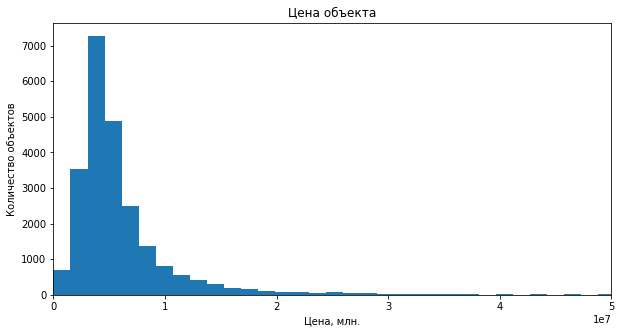

In [56]:
# построим гистрограмму для стоимости
data['last_price'].plot(kind = 'hist', bins=500, figsize=(10,5))
plt.title('Цена объекта')
plt.ylabel('Количество объектов')
plt.xlabel('Цена, млн.')
plt.xlim(0,50000000)
plt.show()

На гистограмме виден длинный "хвост" - это говорит о аномально высоких значениях.

In [57]:
# посмотрим описание данных
data['last_price'].describe()

count    2.350200e+04
mean     6.529110e+06
std      1.084171e+07
min      1.219000e+04
25%      3.420000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [58]:
# выведем максимальное и минимальное значение
display(data['last_price'].min())
data['last_price'].max()

12190.0

763000000.0

Данные находятся в диапазоне от 12190 руб до 763000000 руб. Крайние значения являются выбросами.\
Узнать точно есть ли с ошибки с несколькими нулями в данных объявлениях достоверно нельзя. Возможно цена объекта равнялась 12,190 млн.руб или 121,90 млн.руб, или 1,21 млн.руб.

Посчитаем 95-й и 99-й перцентили цены объектов.

In [59]:
# 95-й и 99-й перцентили цены объектов.
np.percentile(data['last_price'], [95, 99])

array([15298800.00000002, 35896000.00000064])

Не более 5% объектов дороже 15,3 млн.руб и не более 1% дороже 35,9 млн.руб. 
Выберем 40 млн. руб за верхнюю границу цены объекта и 400 тыс.руб за нижнюю границу и отсеим аномальне объявления по ним.

In [60]:
# выведем столбцы с эксремальными значениями
data[data['last_price'] < 400000]
data[data['last_price'] > 40000000]

,total_images,last_price,total_area,first_day_exposition,rooms_number,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_m2,month_exposition,day_exposition,year_exposition,floor_type,city_centers_nearest_km
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,89.810181,9,True,...,84.0,3,234.0,424.0,408176.10,7,4,2015,другой,7.0
51,7,45000000.0,161.0,2017-10-17,3,3.20,8,38.000000,4,True,...,NaN,3,99.0,541.0,279503.11,10,1,2017,другой,7.0
155,8,96000000.0,317.0,2017-07-07,4,3.50,3,183.000000,3,True,...,508.0,3,366.0,62.0,302839.12,7,4,2017,последний,2.0
411,1,40662000.0,151.0,2014-12-09,3,2.80,8,85.000000,3,True,...,630.0,3,100.0,594.0,269284.77,12,1,2014,другой,6.0
492,18,95000000.0,216.0,2017-12-05,4,3.00,5,86.000000,4,True,...,138.0,3,620.0,14.0,439814.81,12,1,2017,другой,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22709,20,59000000.0,127.5,2016-12-21,4,3.00,12,85.000000,8,True,...,84.0,3,234.0,635.0,462745.10,12,2,2016,другой,7.0
22804,4,81960000.0,205.0,2017-09-29,4,3.20,9,108.000000,3,True,...,679.0,1,227.0,169.0,399804.88,9,4,2017,другой,2.0
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6,63.700000,6,True,...,386.0,3,188.0,NaN,1542604.80,3,1,2019,последний,1.0
22907,9,65000000.0,228.0,2016-06-02,4,2.55,5,200.000000,2,True,...,619.0,3,269.0,NaN,285087.72,6,3,2016,другой,1.0


In [61]:
# удалим их
data = data[(data['last_price'] >= 400000) & (data['last_price'] <= 40000000)]
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms_number,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_m2,month_exposition,day_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00000,8,True,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.60000,1,True,...,NaN,0,NaN,81.0,82920.79,12,1,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.30000,4,True,...,90.0,2,574.0,558.0,92785.71,8,3,2015,другой,14.0
3,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00000,13,True,...,112.0,1,48.0,121.0,100000.00,6,1,2018,другой,8.0
4,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40000,5,True,...,NaN,0,NaN,55.0,95065.79,9,0,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23319,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.30000,3,True,...,796.0,3,381.0,NaN,72490.85,3,1,2017,другой,4.0
23320,14,3100000.0,59.00,2018-01-15,3,2.55,5,38.00000,4,True,...,NaN,0,NaN,45.0,52542.37,1,0,2018,другой,NaN
23321,18,2500000.0,56.70,2018-02-11,2,2.80,3,29.70000,1,True,...,NaN,0,NaN,NaN,44091.71,2,6,2018,первый,NaN
23322,13,11475000.0,76.75,2017-03-28,2,3.00,17,43.35177,12,True,...,173.0,3,196.0,602.0,149511.40,3,1,2017,другой,10.0


Построим гистограмму ещё раз.

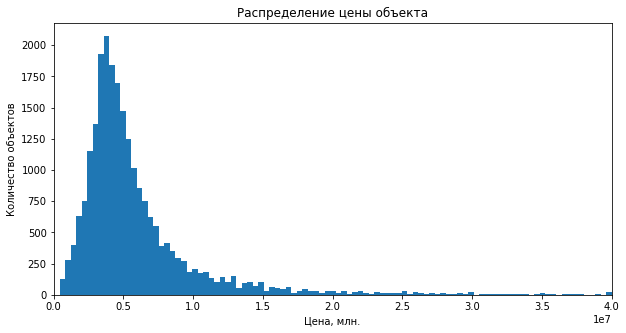

In [62]:
# построим гистрограмму для стоимости
data['last_price'].plot(kind = 'hist', bins=100, figsize=(10,5))
plt.title('Распределение цены объекта')
plt.ylabel('Количество объектов')
plt.xlabel('Цена, млн.')
plt.xlim(0,40000000)
plt.show()

In [63]:
# выведем медианное значение стоимости
data['last_price'].median()

4600000.0

Средняя цена квартир составляет 4.6 млн.руб.

- общая площадь

In [64]:
# описание данных
data['total_area'].describe()

count    23324.000000
mean        58.934715
std         30.080444
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        470.300000
Name: total_area, dtype: float64

Минимально значение - 12. В России установлен стандарт объекта для проживания, площадь которых не должна быть менее 18 кв.м. Изменим данные исходя из этой поправки, установив значения от 18 кв.м.

In [65]:
# сортировка данных исходя из стандартов строительства и удаления выбросов 
data = data.query('total_area >= 18')

In [66]:
# средняя общая площадь
data['total_area'].median()

52.0

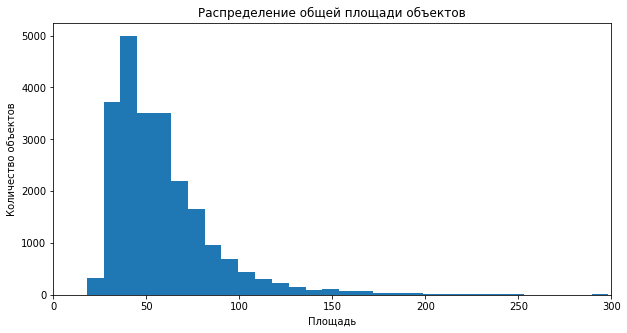

In [67]:
# построим гистрограмму для общей площади
data['total_area'].plot(kind = 'hist', bins=50, figsize=(10,5))
plt.title('Распределение общей площади объектов')
plt.ylabel('Количество объектов')
plt.xlabel('Площадь')
plt.xlim(0,300)
plt.show()

Средняя площадь квартир 52 кв.м. Больше всего квартир с площадью - 45 кв.м 

- жилая площадь

In [68]:
# описание данных
data['living_area'].describe()

count    23309.000000
mean        33.790229
std         19.402359
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        279.600000
Name: living_area, dtype: float64

При выводе данных минимальная жилая площадь составила 2 кв.м. Согласно стандартам строительства в России минимальная площадь должна быть не меньше 8 кв.м. 

Изменим данные исходя из минимального порогового значения 8 кв.м.

In [69]:
# сортировка данных исходя из стандартов строительства
data = data.query('living_area >= 8')

In [70]:
# средняя жилая площадь
data['living_area'].median()

30.0

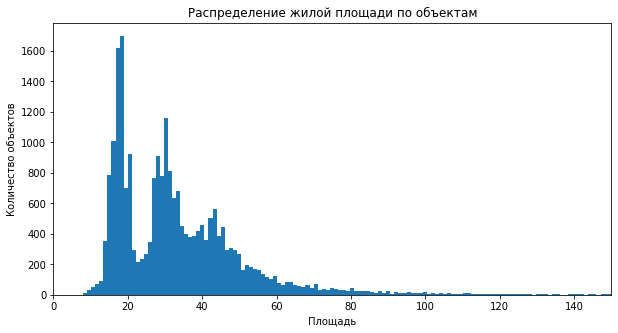

In [71]:
# построим гистрограмму для жилой площади
data['living_area'].plot(kind = 'hist', bins=250, figsize=(10,5))
plt.title('Распределение жилой площади по объектам')
plt.ylabel('Количество объектов')
plt.xlabel('Площадь')
plt.xlim(0,150)
plt.show()

Средняя жилая площадь - 30 кв.м. Чаще всего встречаются квартиры с жилой площадью 18 кв.м. Возможно пики связаны со стандартными планировками квартир и, соответственно, стандартными жилыми комнатами/площадями.

- площадь кухни

In [72]:
# описание данных
data['kitchen_area'].describe()

count    23302.000000
mean        10.385782
std          5.412453
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        100.700000
Name: kitchen_area, dtype: float64

При выводе данных минимальная площадь кухни составила 1 кв.м. Согласно стандартам строительства в России минимальная площадь должна быть не менее 5 кв.м. Установим минимальное значение для площади кухни 5 кв.м, удалив при этом выбросы.

In [73]:
# сортировка данных исходя из стандартов строительства и удаления выбросов 
data = data.query('kitchen_area >= 5')

In [74]:
# средняя площадь кухни
data['kitchen_area'].median()

9.1

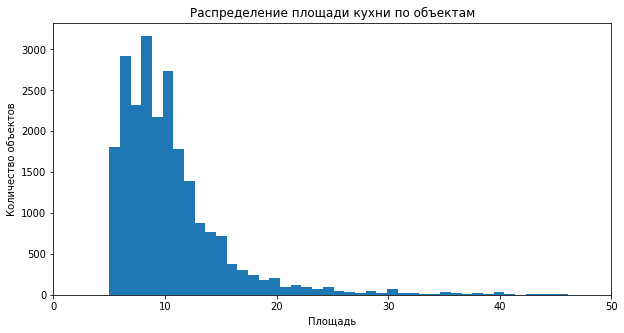

In [75]:
# построим гистрограмму для площади кухни
data['kitchen_area'].plot(kind = 'hist', bins=100, figsize=(10,5))
plt.title('Распределение площади кухни по объектам')
plt.ylabel('Количество объектов')
plt.xlabel('Площадь')
plt.xlim(0,50)
plt.show()

Средняя площадь кухни составляет 9,1 кв.м.

- количество комнат

In [76]:
# описание данных
data['rooms_number'].describe()

count    22981.000000
mean         2.073844
std          1.038922
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms_number, dtype: float64

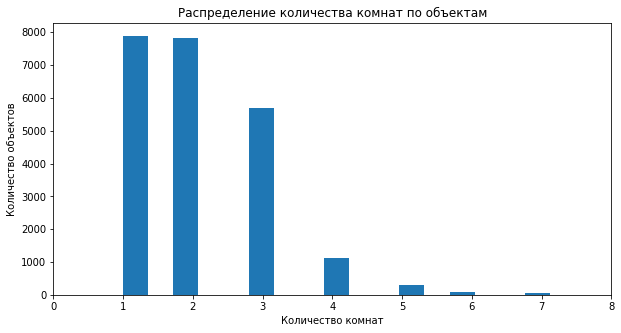

In [77]:
# построим гистрограмму для количества комнат
data['rooms_number'].plot(kind = 'hist', bins=50, figsize=(10,5))
plt.title('Распределение количества комнат по объектам')
plt.ylabel('Количество объектов')
plt.xlabel('Количество комнат')
plt.xlim(0,8)
plt.show()

В продаже больше всего 1 и 2 комнатных квартир. Этих объявлений порядка 8 тыс. для каждой из этих категорий. Так же много 3-х комнатных квартир, чуть меньше 6000 объявлений о продаже. Наблюдается прямая зависимость - чем больше комнат, тем меньшее количество данных квартир в продаже.

- высота потолков

In [78]:
# описание данных
data['ceiling_height'].describe()

count    22981.000000
mean         2.704014
std          0.223419
min          2.450000
25%          2.550000
50%          2.650000
75%          2.750000
max          4.800000
Name: ceiling_height, dtype: float64

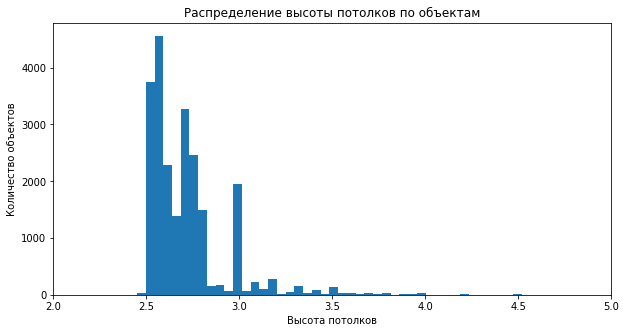

In [79]:
# построим гистрограмму для высоты потолков
data['ceiling_height'].plot(kind = 'hist', bins=50, figsize=(10,5))
plt.title('Распределение высоты потолков по объектам')
plt.ylabel('Количество объектов')
plt.xlabel('Высота потолков')
plt.xlim(2,5)
plt.show()

Данные по высоте потолков были ранее обработаны на предыдущем шаге таким образом, что диапазон высоты потолок начинается от 2.4 м (минимальный стандарт в России) до 5 метров.

Средняя высота потолков 2.65 м.

- тип этажа

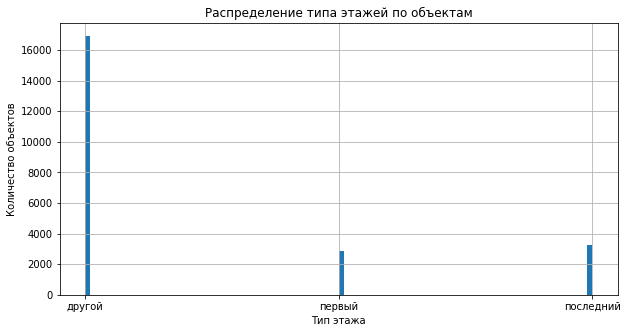

In [80]:
# построим гистрограмму для типа этажа
plt.figure(figsize=(10,5))
data['floor_type'].hist(bins=100)
plt.title('Распределение типа этажей по объектам')
plt.ylabel('Количество объектов')
plt.xlabel('Тип этажа')
plt.show()

Меньше всего квартир продавалось на первом этаже, а основной диапазон квартир находится в категории 'другой', то есть не первый и не последний этажи, что абсолютно логично.

- общее количество этажей

In [81]:
# описание данных
data['floors_total'].describe()

count    22981.000000
mean        10.661285
std          6.569835
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

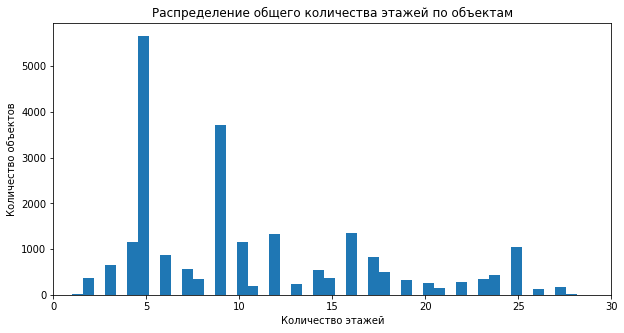

In [82]:
# построим гистрограмму для общего количества этажей
data['floors_total'].plot(kind = 'hist', bins=100, figsize=(10,5))
plt.title('Распределение общего количества этажей по объектам')
plt.ylabel('Количество объектов')
plt.xlabel('Количество этажей')
plt.xlim(0,30)
plt.show()

Больше всего квартир в продаже находятся в 5 этажных домах, а также есть пики 9, 12, 16, 25 этажных домов - типовой этажности.

- удаленность от центра

In [83]:
# описание данных
data['city_centers_nearest'].describe()

count    17665.000000
mean     14278.784829
std       8586.367206
min        181.000000
25%       9432.000000
50%      13149.000000
75%      16315.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

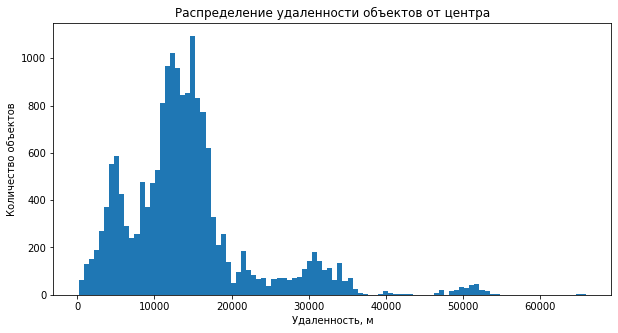

In [84]:
# построим гистрограмму для удаленности от центра в метрах
data['city_centers_nearest'].plot(kind = 'hist', bins=100, figsize=(10,5))
plt.title('Распределение удаленности объектов от центра')
plt.ylabel('Количество объектов')
plt.xlabel('Удаленность, м')
plt.show()

Наибольшее количество квартир находятся на расстоянии от 10000 до 18000 метров.

- удаленность от парков

In [85]:
# описание данных
data['parks_nearest'].describe()

count    7809.000000
mean      492.374568
std       342.786265
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

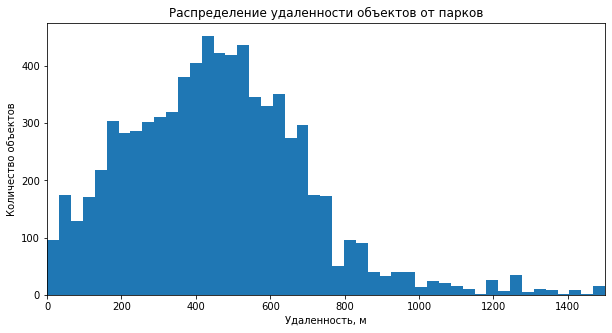

In [86]:
# построим гистограмму для удаленности от парков
data['parks_nearest'].plot(kind = 'hist', bins=100, figsize=(10,5))
plt.title('Распределение удаленности объектов от парков')
plt.ylabel('Количество объектов')
plt.xlabel('Удаленность, м')
plt.xlim(0,1500)
plt.show()

В основном квартиры находятся на расстояние до 800 метрах от парков. Звучит прекрасно!

#### Продолжительность продажи квартиры

In [87]:
# выведем описание данных
data['days_exposition'].describe()

count    19887.000000
mean       180.676824
std        219.424598
min          1.000000
25%         45.000000
50%         96.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

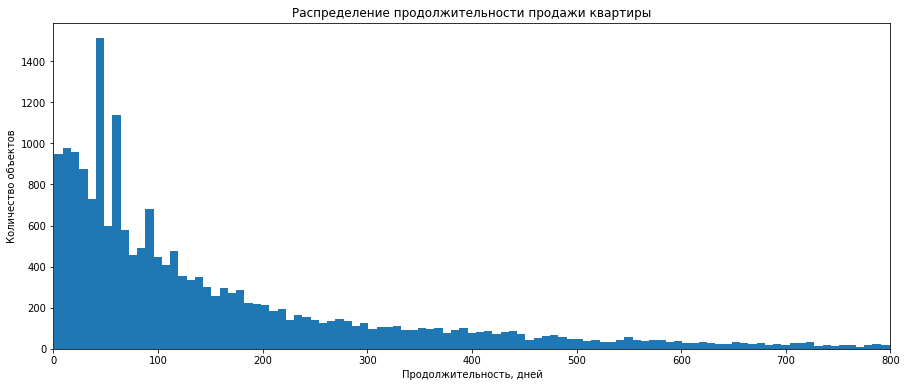

In [88]:
# построим гистограмму 
data['days_exposition'].plot(kind = 'hist', bins=200, figsize=(15,6))
plt.title('Распределение продолжительности продажи квартиры')
plt.ylabel('Количество объектов')
plt.xlabel('Продолжительность, дней')
plt.xlim(0,800)
plt.show()

Минимальное значение дней продажи квартиры - 1. Вполне возможно, что квартиру купили в этот же день. Максимальное количество дней - 1580 (чуть больше 4 лет). Такое тоже бывает, возможно с продажей возникли проблемы, либо состояние квартиры, расположение, соотношение цена/качество были завышенными, поэтому квартира так долго продавалась. В среднем квартиры продавались около 180 дней, а медианное значение составляет 96 дня. То есть можно сказать, что 'обычно' квартиры продаются в течение 96 дней, но если у квартиры есть какие-то особенности, например, очень большая или маленькая площадь, удалённый/неудобный район, высокая стоимость или какие-то другие факторы, то средний срок продажи квартиры может вырасти до 180 дней.\
Быстрыми продажами, на мой взгляд, можно считать продажи, лежащие в 1 квартиле, то есть до 45 дней, а долгими, принадлежащих 4 квартилю, то есть более 231 дня.\
Графику характерны пики в районе 45 и 60 дней. Возможно, это связано со сроками размещения объявления на сайте. Клиент забыл снять объявление с продажи или решил не продлевать его.

#### Факторы влияющие на стоимость квартиры

- общая площадь

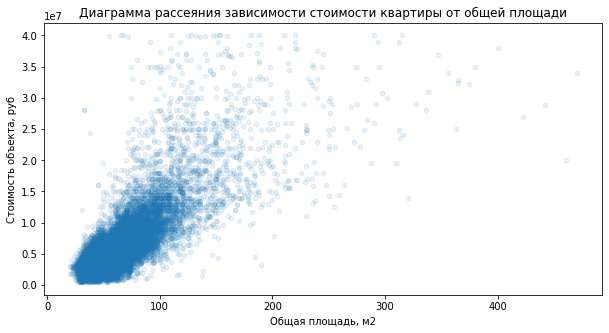

0.7856866822233383

In [89]:
# зависимость цены от общей площади
# выведем диаграмму рассеяния
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1, figsize=(10,5))
plt.title('Диаграмма рассеяния зависимости стоимости квартиры от общей площади')
plt.xlabel('Общая площадь, м2')
plt.ylabel('Стоимость объекта, руб')
plt.show()

# выведем коэффициент корреляции
data['last_price'].corr(data['total_area'])

Исходя из графика видно, что чем больше площадь квартиры, тем выше её цена. Коэффициент корреляции равный 0.78 подтвержает это утверждение.

- жилая площадь

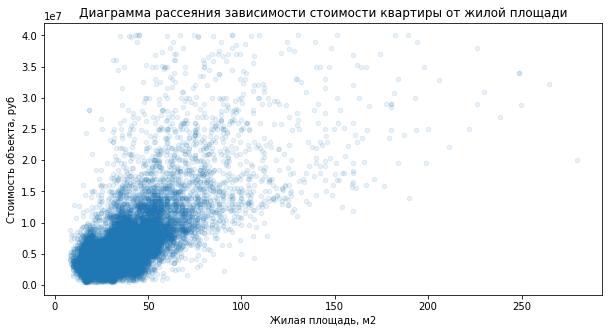

0.6973142015886903

In [90]:
# зависимость цены от жилой площади
# выведем диаграмму рассеяния
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.1, figsize=(10,5))
plt.title('Диаграмма рассеяния зависимости стоимости квартиры от жилой площади')
plt.xlabel('Жилая площадь, м2')
plt.ylabel('Стоимость объекта, руб')
plt.show()

# выведем коэффициент корреляции
data['last_price'].corr(data['living_area'])

Чем больше жилая площадь, чем выше цена.

- площадь кухни

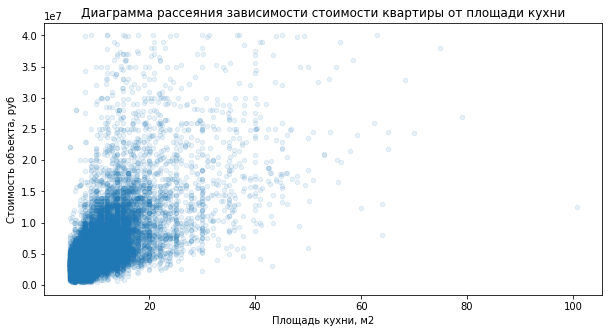

0.6218106756961709

In [91]:
# цена от площади кухни 
# выведем диаграмму рассеяния
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.1, figsize=(10,5))
plt.title('Диаграмма рассеяния зависимости стоимости квартиры от площади кухни')
plt.xlabel('Площадь кухни, м2')
plt.ylabel('Стоимость объекта, руб')
plt.show()

# выведем коэффициент корреляции
data['last_price'].corr(data['kitchen_area'])

Стоимость недвижимости также влияет от площади кухни. Чем площадь кухни больше, тем соответственно и выше цена.

- количество комнат

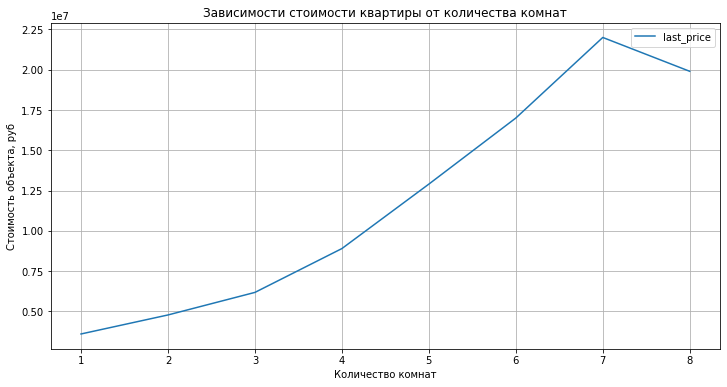

0.5174378200758146

In [92]:
# цена от количества комнат до 8
rooms = data.query('rooms_number <= 8')
rooms.pivot_table(index='rooms_number', values='last_price', aggfunc='median').plot(grid=True, style='-', figsize=(12,6))
plt.title('Зависимости стоимости квартиры от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость объекта, руб')
plt.show()

# выведем коэффициент корреляции
data['last_price'].corr(data['rooms_number'])

Ограничим диапазон, чтобы более явно увидеть линию тренда.

Здесь так же без изменений - тем больше комнат, тем выше цена. Цена постепенно растёт в связи с увеличением количества комнат.

- этаж

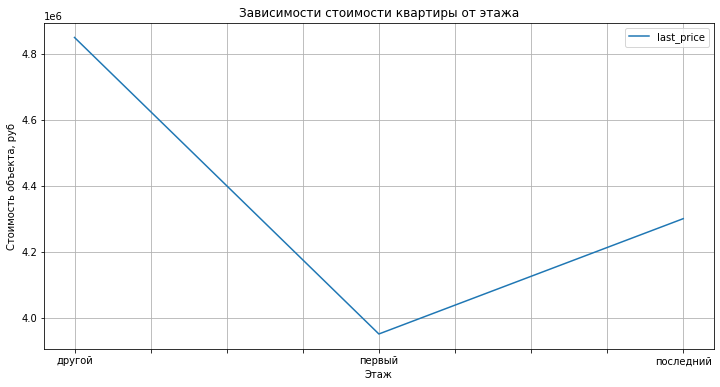

In [93]:
# цена от этажа квартиры
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='-', figsize=(12,6))
plt.title('Зависимости стоимости квартиры от этажа')
plt.xlabel('Этаж')
plt.ylabel('Стоимость объекта, руб')
plt.show()

Цена на первом и последних этажах ниже.

- дата размещения

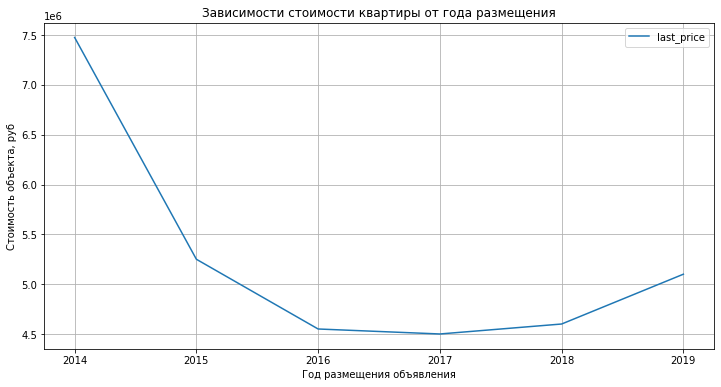

-0.03749435766082479

In [94]:
# цена от даты размещения, год
data.pivot_table(index= 'year_exposition', values='last_price', aggfunc='median').plot(grid=True, style='-', figsize=(12,6))
plt.title('Зависимости стоимости квартиры от года размещения')
plt.xlabel('Год размещения объявления')
plt.ylabel('Стоимость объекта, руб')
plt.show()

#выведем коэффициент корреляции
data['last_price'].corr(data['year_exposition'])

Пик, наибольшая цена, был в 2014 году. С 2014 по 2017 год наблюдалась тенденция к снижению стоимости жилья и с 2017 года начался постепенный рост.

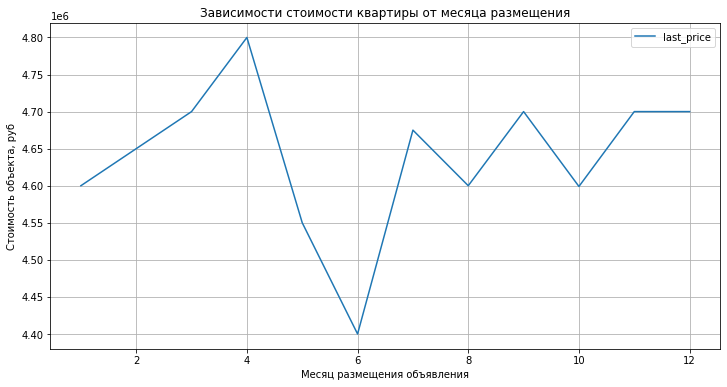

0.003621154851228354

In [95]:
# цена от даты размещения, месяц
data.pivot_table(index= 'month_exposition', values='last_price', aggfunc='median').plot(grid=True, style='-', figsize=(12,6))
plt.title('Зависимости стоимости квартиры от месяца размещения')
plt.xlabel('Месяц размещения объявления')
plt.ylabel('Стоимость объекта, руб')
plt.show()

#выведем коэффициент корреляции
data['last_price'].corr(data['month_exposition'])

Самая высокая цена приходится на апрель, а самая низкая на июнь, но разница в цене незначительная.

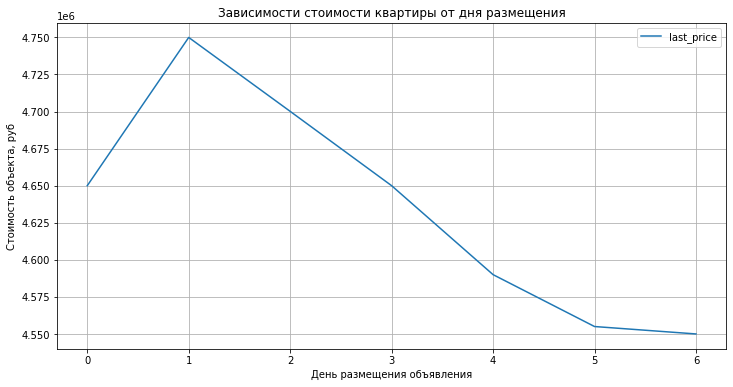

-0.012439994360575428

In [96]:
# цена от даты размещения, день
data.pivot_table(index= 'day_exposition', values='last_price', aggfunc='median').plot(grid=True, style='-', figsize=(12,6))
plt.title('Зависимости стоимости квартиры от дня размещения')
plt.xlabel('День размещения объявления')
plt.ylabel('Стоимость объекта, руб')
plt.show()

#выведем коэффициент корреляции
data['last_price'].corr(data['day_exposition'])

Значения могут меняться ото дня к дню, но это изменение незначительное. Цена с пика приходящегося на вторник постепенно снижается к выходным.

#### Средняя стоимость одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [97]:
# найдем среднюю стоимость квадратного метра для каждого из 10 населенных пунтов с наибольшим количеством объявлений
top = data.pivot_table(index='locality_name', values='price_m2', aggfunc=('count','mean')).sort_values('count', ascending=False).head(10)

# выведем таблицу на экран
top

,count,mean
locality_name,,
Санкт-Петербург,15282,111505.744810
поселок Мурино,501,84517.753273
поселок Шушары,431,78047.965244
Всеволожск,393,68778.568499
Пушкин,362,103185.808619
Колпино,336,75350.597232
поселок Парголово,326,90273.589724
Гатчина,302,68846.422119
деревня Кудрово,275,91833.757855


In [98]:
# найдем среднюю стоимость квадратного местра по всем населенным пунктам вместе
top['mean'].mean()

83029.57183270196

Больше всего объявлений о продаже квартир находится в городе Санкт-Петербург. Так же в Санкт-Петербурге самая высокая стоимость 1 кв.м равная 111505 руб. Самая низкая стоимость квадратного метра из топ-10 в городе Выборг = 57955 руб.\
Усредненная стоимость 1 кв.м жилья составляет 83 030 руб.

#### Средняя стоимость квартир в Санкт-Петербурге на разном удалении от центра

In [99]:
# выделим строки для Санкт-Петербурга
spb = data.query('locality_name=="Санкт-Петербург"')

# выведем на экран среднюю стоимость квартир в Санкт-Петербурге на разном удалении от центра
spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc = 'median')

,last_price
city_centers_nearest_km,
0.0,12500000.0
1.0,10770000.0
2.0,9750000.0
3.0,8400000.0
4.0,9200000.0
5.0,9200000.0
6.0,8500000.0
7.0,7300000.0
8.0,7400000.0


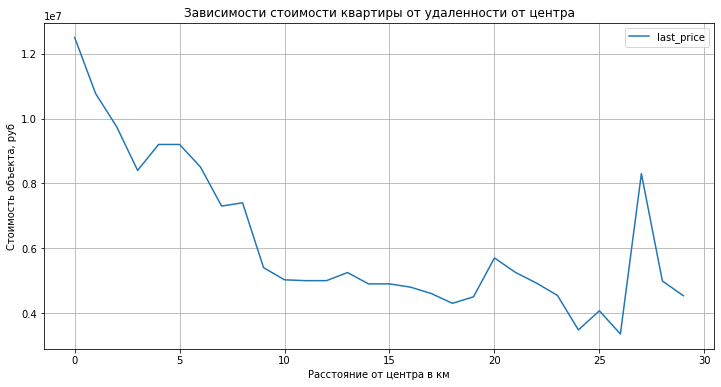

In [100]:
# выведем график зависимости стоимости квартир от удаленности от центра
spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc = 'median').plot(grid=True, style='-',figsize=(12,6))
plt.title('Зависимости стоимости квартиры от удаленности от центра')
plt.xlabel('Расстояние от центра в км')
plt.ylabel('Стоимость объекта, руб')
plt.show()

По графику и таблице видно, что стоимость квартиру по чуть-чуть, от километра к километру приближаясь к центру увеличивается. Наиболее дорогие квартиры находятся в пределе 8 километров от центра города. Предполагаю, что на стоимость квартир также оказывают влияние качество самого дома, развитость инфраструктуры, удобство месторасположения, наличия метро, школ/детсадов и т.д. Интресным является резкий скачок цен в 27 км от центра города. Возможно, там расположен какой-то элитный поселок недвижимости.

### Общий вывод

В результате аналитической работы по выявлению закономерностей и факторов влияющих на формирование цен на неджвижимость в городе Санкт-Петербург были проанализированы данные о продажах квартир с 2014 по 2019 год. Общее количество таких объявлений составило 23699.
Исходные данные имели пропуски, неточности и аномалии, которые могли возникнуть в результате ошибок при выгрузке данных или неточностей в момент заполнения объявления. В результате обработки, было удалено 1.2 % от общей информации.

**Основными факторами, по которым проводились исследования являются:**
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка.

**В результате анализа данных параметров, выявлено :**
- общая площадь жилой недвижимости в городе Санкт-Петербурге в среднем составляет 52 кв.метров. Самая большая продаваемая квартира за это время появилась в 2017 году, с общей площадью 900 кв.м и стоимостью в 420 млн.руб.
- среднее значение жилой площади составляет 30 квадратных метра, но наиболее часто встречаются квартиры с жилой площадью около 18 кв.м
- наибольшее количество квартир лежит в диапазоней площадей кухонь от 6 до 10 кв.метров, при том квартиры с площадью кухни более 15 кв.м уже являются редкостью
- средняя стоимость квартир составляет 4.6 млн.руб. Здесь нужно учитывать, что данная средняя стоимость формируется из объявлений о продаже, формированных как для Санкт-Петербурга, так и для близлежащих населенных пунктов. Естественно, что наиболее высокая цена наблюдается в городе, а чем ближе к центру, тем цена становится всё выше и выше, от километра к киломметру. Так, например, средняя стоимость квартир на удалении в 15 км составляет 4.9 млн.руб, в 5 км от центра 9.5 млн.руб, а непосредственно недвижимость в самом центре обойдется около 12.5 млн.руб. Самой дорогой является недвижимость расположенная в радиусе 8 км от центра города.
- самыми 'популярными' являются одно и двух- комнатные квартиры. Общее количество таких квартир 15721, при чём соотношение распределяется примерно поровну. Ещё 5752 - трёхкомнатных квартир и далее чем больше комнат в квартире, тем их количество меньше.
- в среднем высота потолков 2.65 метров
- по типу этажей в доме можно сказать, что объявлений квартир на последнем этаже чуть больше, чем на первом.
- больше всего объявлений о продаже квартир в 5 этажных домах, возможно это связанно с особой архитектурой города, исторической частью и строгими архитектурными нормами строительства. На втором месте распологаются 9 этажные дома, что более присущее, возможно, для окраин города и более современного строительства.
- наибольшее количество квартир находятся на расстоянии 10000 - 18000 метров от центра города.
- с большинством домов в 800 от них расположены парки.

**Факторы влияют на общую (полную) стоимость объекта** 

В результате анализа были определены факторы, влиющие на стоимость объекта ( от большего к меньшему):
1. Больше всего на стоимость влияет общая площадь квартиры, чем она больше, тем выше цена.
2. Далее следует жилая площадь. Зависимость схожа, чем больше жилая площадь, тем выше цена.
3. На третьем месте располагается площадь кухни. Всё без изменений - цена повышается по мере увеличения площади кухни.
4. Зависимость по этажности характеризуется следующим образом:
- самые дешевые квартиры располагаются на первом этаже со средней стоимостью чуть ниже 4 млн.руб
- чуть дороже стоят квартиры на последнем этаже около 4.35 млн.руб
- остальные квартиры в общем стоят дороже двух вышеперечисленных категорий.
5. С датой размещения объявления дела обстоят интереснее:
- Можно вывить тенденцию, согласно которой цена стабильно уменьшалась от 2014 до 2017 года и затем вышла на постепенный рост к 2019 году
- Самые низкие цены на жильё в течении 5 лет наблюдались в июне в среднем около 4.45 млн.руб
- Пик приходится на апрель, когда средняя стоимость составляла порядка 4.8 млн.руб
- Рост цен на 0.17 млн.руб наблюдается с января по апрель , а затем снижение на 0.35 млн.руб с апреля по июнь, с июля по декабрь цены колеблются в одном диапазон
- В зависимости от дней недели цена может колебатся на 0.2 млн.руб, самые высокие цены наблюдались во вторник с плавным снижением цен к воскресенью.

Помимо всего прочего сильное влияние на стоимость недвижимости оказывается месторасположение квартиры. Для удобства подсчета использовалась средняя стоимость квадратного метра объекта. Таким образом, можно сказать что самая высокая цена у недвижимости, расположенной в городе, а не близлежащих населенных пунктов рядом с городов. А в самом городе повышение цены происходит по принципу - чем ближе к центру, тем выше цена.
Выделены 10 населенных пунктов с бОльшим количеством объявлений и с самыми высокими цена за кв.м- это:
1. Санкт-Петербург	
2. поселок Мурино	
3. поселок Шушары	
4. Всеволожск
5. Пушкин
6. Колпино	
7. поселок Парголово
8. Гатчина
9. деревня Кудрово
10. Выборг 

Лидером является Санкт-Петербурге с 15282 объявлений и стоимость 111505 руб за кв.м недвижимости. Выборг замыкает эту десятку с 231 объявлением. 1 кв.метр жилья там вам обойдется в 57955 руб.
Также мы выяснили, что цена в Санкт-Петербурге зависит и от удаленности расположения недвижимости к центру. Так объект расположенный в 29 км от центра города стоил в среднем 4.5 млн.руб, тогда как в самом центре цена составляла уже 12.5 млн.руб.

**Сроки продажи недвижимости**

- Минимальный срок продажи квартиры составлял 1 день, то есть объявление было размещено на сайте лишь сутки!
- Самая продолжительная продажа составила чуть больше 4 лет - 1580 дней. Такое бывает, возможно у собственника возникли личные проблемы при продаже квартиры, либо состояние квартиры, расположение, соотношение цены, то есть факторы, о которых было написано выше были плохо учтены и поэтому квартира продавалась так долго.
- Среднее время продажи квартиры составляет 96 дней. То есть можно сказать, что 'обычно' квартиры продаются в течение 96 дней, но если у квартиры есть какие-то особенности, например, очень большая или маленькая площадь, удалённый/неудобный район, высокая стоимость или какие-то другие факторы, то сроки продажи квартиры могут увеличиться. 
- Быстрыми можно считать продажи осуществленные в течение 45 дней, долгими - более 231 день.

**Таким образом** на стоимость недвижимости влияют такие факторы как : общая, жилая и кухонная площади, расположение, время размещения, этаж и количество комнат.
Наиболее привлекательной и в то же время дорогой (исходя из правила спрос рождает предложение) за 1 кв.м жилья будет недвижимость, расположенная ближе к центру города, имеющая 1 или 2 комнаты, не на первом и последних этажах. Для оценки стоимости нужно будет также брать в расчёт сезонность ( апрель, сентябрь - высокий сезон, июнь - низкий) и конечно же год (нужно опираться на актуальные значения и состояние экономики, рост цен, инфляция и т.д)

**Рекомендации:**\
Для более углубленного анализа было неплохо также узнать год постройки дома, состояние ремонта (например, евро, дизайнерский или черновой объект), наличие парковки, расположенных рядом детсадов/школ/университетов, станций метро/остановок общественного транспорта и провести зависимости роста или снижения цен от этих факторов.
